# Globals

In [29]:
import pandas as pd
import numpy as np
import yaml
import glob
import os
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 13})

# Plot WGD status

In [2]:
def calculate_wgd_status(df:pd.DataFrame) -> pd.Series:
    """ return WGD status based on LOH (fraction) and Ploidy
    """
    wgd_status = ((2.8 - (1.1/0.85) * df['LOH']) < df['Ploidy'])# -(1.1/0.85) * LOH + 2.8 < Ploidy
    return wgd_status

## parse WGD status tsv

In [8]:
metadata_path = yaml.load(open('../config/pipeline.yaml'), Loader=yaml.Loader)['metadata']
metadata = pd.read_table(metadata_path)
samples = metadata['isabl_sample_id'].unique()

In [12]:
results_path = '../output/results'

In [13]:
df = pd.DataFrame()
for sample in samples:
    wgd_path = f'{results_path}/{sample}.wgd.tsv'
    if not os.path.exists(wgd_path): continue
    wgd = pd.read_table(wgd_path)
    wgd.index = [sample]
    df = pd.concat([df, wgd])

## parse PCAWG

In [15]:
pcawg_path = '/juno/work/shah/users/mcphera1/repos/spectrumanalysis/external/pcawg_cnv/ploidy_loh.csv.gz'
pcawg = pd.read_csv(pcawg_path)
pcawg.rename(columns={'loh': 'LOH', 'ploidy':'Ploidy'}, inplace=True)
pcawg.set_index('sample', inplace=True)
wgd_status = calculate_wgd_status(pcawg)

## QC

In [23]:
# wgd_status = ((2.9 - 2 * df['LOH']) <= df['Ploidy'])# 2.9 -2*hom <= ploidy
# wgd_status = ((2.8 - (1.1/0.85) * df['LOH']) < df['Ploidy'])# -(1.1/0.85) * LOH + 2.8 < Ploidy
_wgd_status = calculate_wgd_status(df)

In [24]:
(_wgd_status != df['WGD']).sum()

0

## plot

In [25]:
# line_x = np.linspace(0.02, 0.78, 50)
line_x = np.linspace(0.01, 0.95, 50)

In [26]:
line_y = 2.8 - (1.1/0.85) * line_x

In [39]:
?leg.handles

Object `leg.handles` not found.


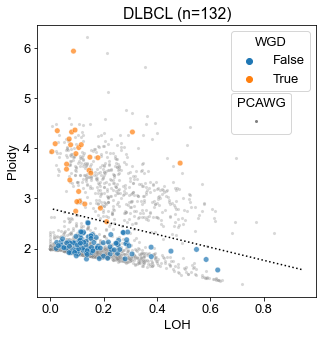

In [48]:
cohort = 'DLBCL'

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(5)
p1 = sns.scatterplot(data=pcawg, x='LOH', y='Ploidy', color='grey', alpha=0.3, ax=ax, s=10)
p2 = sns.scatterplot(data=df, x='LOH', y='Ploidy', hue='WGD', ax=ax, alpha=0.7, s=30)
ax.plot(line_x, line_y, "k:")#color='grey', linestyle='--')
ax.set_xlabel('LOH');
ax.set_title(f'{cohort} (n={df.shape[0]})');

leg = ax.legend(title="WGD", frameon=True)
ax.add_artist(leg)
h = [plt.plot([],[], color="gray", marker="o", ms=2, ls="")[0]]
plt.legend(handles=h, labels=[''], title="PCAWG", loc=(0.695,0.6), frameon=True)